In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.5, rc={"lines.linewidth": 2,'lines.markersize': 8.0,})

In [2]:
import pickle
import numpy as np
from orphics.stats import FisherMatrix
from six.moves import configparser
import six

if six.PY2:
  ConfigParser = configparser.SafeConfigParser
else:
  ConfigParser = configparser.ConfigParser

In [3]:
fisherfile = '../datatest/fisher_dc_updated_abund-clustering_2018-11-23-16-13-15-EST.pkl'
paramsfile = '../datatest/S4-1.0-CDT_grid-owl2_v0.6_params_2018-11-20-11-42-30-EST.npy'

params = np.load(paramsfile).item()

with open(fisherfile, 'rb') as pickle_file:
    fisher = pickle.load(pickle_file)

In [4]:
fisher = FisherMatrix(fisher.values, fisher.columns.values)

/Users/dylan/Development/orphics/orphics/stats.py:203: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


In [5]:
constraints = fisher.sigmas()

In [6]:
def _get_latex_params(inifile):
    config = ConfigParser()
    config.optionxform=str
    config.read(inifile)

    latex_param_list = config.items('fisher-clustering', 'paramLatexList')[0][1].split(',')
    return latex_param_list

INI = '../input/pipeline.ini'

latex_params = _get_latex_params(INI)
latex_paramdict = {}
for index,key in enumerate(params):
    latex_paramdict[key] = latex_params[index]

In [7]:
params_to_plot = list(constraints.keys())
params_to_plot.remove('tau')
constraints_to_plot = [constraints[par] for par in params_to_plot]
latex_to_plot = ['$' + latex_paramdict[key] + '$' for key in params_to_plot]

In [8]:
import pandas as pd
df = pd.DataFrame({"params":latex_to_plot, "sigmas":constraints_to_plot})

/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


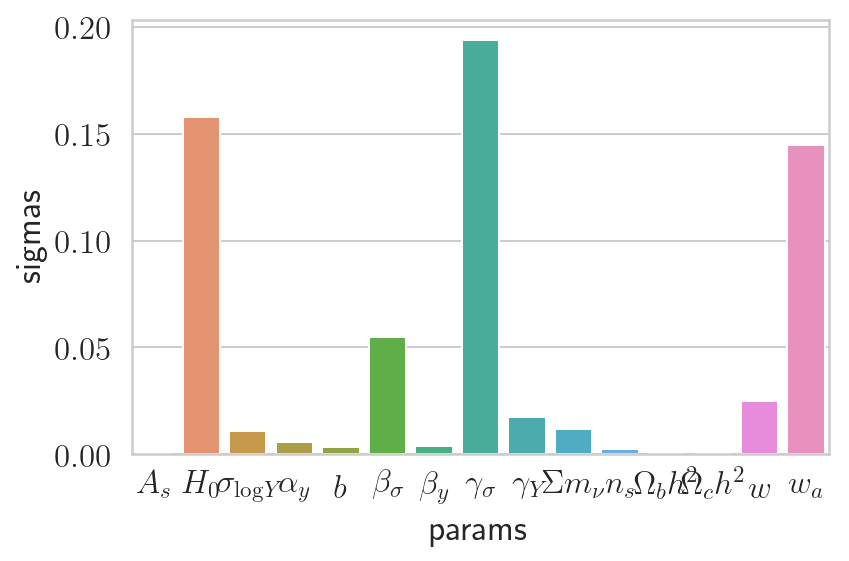

In [9]:
sns.barplot(x="params", y="sigmas", data=df)

In [10]:
df['params']

0                        $A_s$
1                        $H_0$
2     $\sigma_{\mathrm{log}Y}$
3                   $\alpha_y$
4                          $b$
5             $\beta_{\sigma}$
6                    $\beta_y$
7              $\gamma_\sigma$
8                   $\gamma_Y$
9             $\Sigma m_{\nu}$
10                       $n_s$
11               $\Omega_bh^2$
12               $\Omega_ch^2$
13                         $w$
14                       $w_a$
Name: params, dtype: object